In [1]:
import pandas as pd
import numpy as np
print("Environment works!")


Environment works!


In [ ]:


train_df = pd.read_parquet("../data/train_data.parquet")
test_df = pd.read_parquet("../data/test_data.parquet")

#picking features
my_features = [f"f{i}" for i in range(109, 219)]
X_train = train_df[my_features].copy()
X_test = test_df[my_features].copy()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
X_train.head()


Train shape: (770164, 110)
Test shape: (369301, 110)


,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,...,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218
0,0.0,0.0,0.0,None,0.0,None,None,None,None,None,...,0.0,0.0,0.0,0.0,1.0,-1.0,29.0,1.0,None,2.0
1,0.0,0.0,0.0,None,0.0,None,None,None,None,None,...,0.0,0.0,0.0,0.0,1.0,-263.0,180.0,1.0055555555555555,250.0,None
2,0.0,0.0,0.0,None,0.0,None,None,None,None,None,...,0.0,0.0,0.0,0.0,1.0,-1.0,29.0,1.0,None,10.0
3,0.0,0.0,0.0,None,0.0,None,None,None,None,None,...,0.0,0.0,0.0,0.0,1.0,-1.0,29.0,1.0,None,10.0
4,0.0,0.0,0.0,None,0.0,None,None,None,None,None,...,0.0,0.0,0.0,0.0,1.0,-1.0,29.0,1.0,None,8.0


In [3]:
# See how many nulls each column has
null_train = X_train.isnull().sum()
null_test = X_test.isnull().sum()

print("Train missing values:\n", null_train[null_train > 0])
print("Test missing values:\n", null_test[null_test > 0])


Train missing values:
 f109     11674
f110    243537
f111     53386
f112    770164
f113      7703
         ...  
f214     68821
f215     68821
f216     71026
f217    274151
f218    579496
Length: 110, dtype: int64
Test missing values:
 f109      4921
f110    118496
f111     26955
f112    369301
f113      3421
         ...  
f214     32324
f215     32324
f216     33434
f217    126631
f218    281726
Length: 110, dtype: int64


In [5]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


In [6]:
# Drop constant (zero variance) columns
constant_cols = [col for col in X_train.columns if X_train[col].nunique() == 1]

print(f"Dropping {len(constant_cols)} constant columns")

X_train.drop(columns=constant_cols, inplace=True)
X_test.drop(columns=constant_cols, inplace=True)


Dropping 5 constant columns


In [8]:
print(X_train.isna().sum().sum())  # Total NaNs in train
print(X_test.isna().sum().sum())   # Total NaNs in test


3080656
1477204


In [9]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


In [10]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


In [11]:
print(X_train.isna().sum().sum())  # should now be 0
print(X_test.isna().sum().sum())   # should now be 0


3080656
1477204


In [12]:
missing_cols = X_train.columns[X_train.isna().any()]
print(missing_cols)
print(X_train[missing_cols].isna().sum())


Index(['f112', 'f122', 'f135', 'f136'], dtype='object')
f112    770164
f122    770164
f135    770164
f136    770164
dtype: int64


In [13]:
print(X_train['f112'].unique()[:20])


[nan]


In [14]:
print(X_train['f122'].unique()[:20])


[nan]


In [15]:
print(X_train['f135'].unique()[:20])

[nan]


In [16]:
X_train = X_train.drop(columns=['f112', 'f122', 'f135', 'f136'])
X_test = X_test.drop(columns=['f112', 'f122', 'f135', 'f136'])


In [17]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())


0
0


applying pca now here we go burrrrr

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check how much variance is explained
print(pca.explained_variance_ratio_.sum())


0.8368125392789598


Matplotlib is building the font cache; this may take a moment.


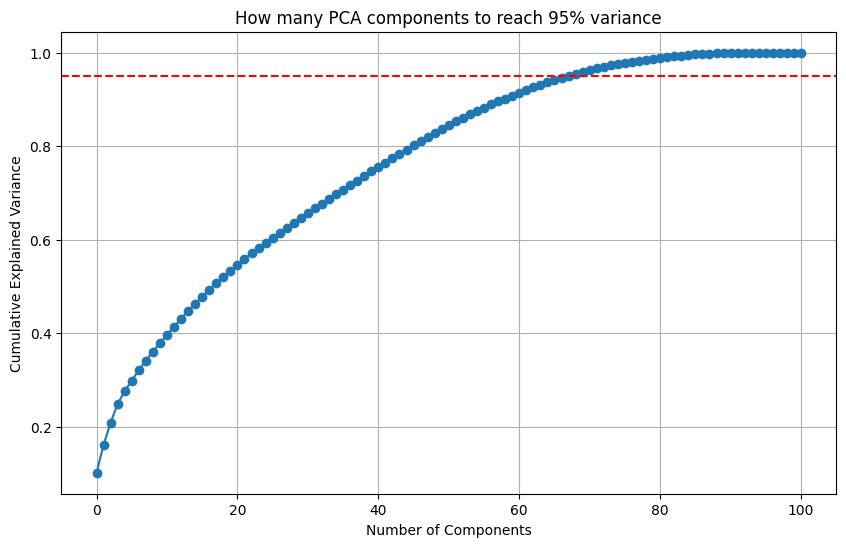

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('How many PCA components to reach 95% variance')
plt.grid(True)
plt.show()


In [23]:
pca = PCA(n_components=63, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [24]:
print("Original shape:", X_train_scaled.shape)
print("After PCA:", X_train_pca.shape)


Original shape: (770164, 101)
After PCA: (770164, 63)


In [25]:
print("Total variance explained:", np.sum(pca.explained_variance_ratio_))


Total variance explained: 0.9258471671876252


In [27]:
import pandas as pd

# Convert PCA arrays to DataFrames
df_train_pca = pd.DataFrame(X_train_pca)
df_test_pca = pd.DataFrame(X_test_pca)

# Save to the outputs folder in the project root
df_train_pca.to_csv("../outputs/X_train_pca.csv", index=False)
df_test_pca.to_csv("../outputs/X_test_pca.csv", index=False)

